<a href="https://colab.research.google.com/github/Shubhi550/TheAndroidAppMarket/blob/master/AndroidAppMarket_Code1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#dataframes & mathematical calculations
import pandas as pd
import numpy as np

#plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

#to solve blank output problem of graphs in colab
import plotly.io as pio
pio.renderers.default = 'colab'
from plotly.offline import init_notebook_mode, iplot

#matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




In [37]:
from google.colab import drive
drive.mount('/content/drive')
#Some rows of the data contain same apps(so our dataframe contains dublicate rows)
df_with_duplicates = pd.read_csv('/content/drive/My Drive/googleplaystore.csv')
df_with_duplicates.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [38]:
df = df_with_duplicates.drop_duplicates()
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


In [39]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [40]:
df['Category']

0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10836                 FAMILY
10837                 FAMILY
10838                MEDICAL
10839    BOOKS_AND_REFERENCE
10840              LIFESTYLE
Name: Category, Length: 10358, dtype: object

In [41]:
len(df)

10358

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [43]:
#list the names of all the columns
df.columns.values.tolist()


['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [44]:
#list the names of the columns which have nan values
df.columns[df.isna().any()].tolist()

['Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver']

In [45]:
#Proceeding towards Data Cleaning 
#info() gave details of columns data type
#Installs, Size & Price columns are objects(but they should be int/float). They are objects because they contains some special chars(, + $)
#These special chars should be removed from the columns -- Installs, Price

In [46]:
chars_to_remove = ['+' , ',' , '$']       #List of chars to be removed
cols_to_clean = ['Installs','Price']      #List of columns to be cleaned

#lopping inside chars_to_remove, which is present inside cols_to_clean
for col in cols_to_clean:
  for char in chars_to_remove:
    df[col] = df[col].astype(str).replace(char, '') #to replace + , $ with an empty string i.e ''(without space) 
    df[col] = pd.to_numeric(df[col], errors='coerce') #convert the columns to numeric data type
    

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        1 non-null      float64
 6   Type            10357 non-null  object 
 7   Price           9592 non-null   float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
# x.unique() = to find unique elements of the list/array - x
# here, list = Column-Category in df dataset
# Print the total number of unique categories
num_categories = len(df['Category'].unique())
print('Number of categories = ', num_categories)

Number of categories =  34


In [48]:
# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = df['Category'].value_counts().sort_values(ascending = False)

#Distribution of different apps across different categories
data = [go.Bar(x = num_apps_in_category.index,      # index = category name
               y = num_apps_in_category.values)]    # value = count

py.iplot(data)

In [49]:
df.describe() #we can also find the average app ratings like this

,Rating,Installs,Price
count,8893.000000,1.0,9592.0
mean,4.189542,0.0,0.0
std,0.545452,NaN,0.0
min,1.000000,0.0,0.0
25%,4.000000,0.0,0.0
50%,4.300000,0.0,0.0
75%,4.500000,0.0,0.0
max,19.000000,0.0,0.0


In [50]:
print(df['Rating'].mean)

<bound method Series.mean of 0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10358, dtype: float64>


In [51]:
fig = go.Figure(
    data=[go.Histogram(x = df['Rating'])],
    layout=go.Layout(
        title=go.layout.Title(text="Distribution of apps according to their ratings")
    )
)

fig.show()



In [52]:
# Filter rows where both Rating and Size values are not null
apps_with_size_and_rating_present = df[(~df['Rating'].isnull()) & (~df['Size'].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby(['Category']).filter(lambda x: len(x) >= 250).reset_index()


# Subset apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']


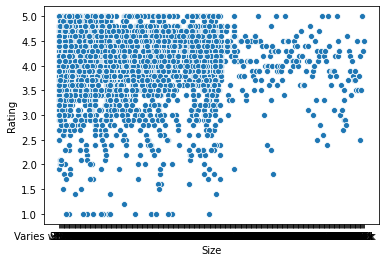

In [53]:
#Size vs Rating for Large Categories
sample_data={'Size':large_categories['Size'],
      'Rating': large_categories['Rating']}
df= pd.DataFrame(sample_data)
sns.scatterplot(x="Size", y="Rating", data=df)